### 任务描述

理解岭回归的基本概念及用途，能够调用sklearn库中的岭回归模型以及对特征进行标准化处理。

### 相关知识

**什么是岭回归？**

岭回归即我们所说的L2正则线性回归，在一般的线性回归最小化均方误差的基础上增加了一个参数w的L2范数的罚项，从而最小化罚项残差平方和：

![jupyter](https://i.loli.net/2021/05/23/tn8w6xoGEBHu14f.png)

简单说来，岭回归就是在普通线性回归的基础上引入单位矩阵。回归系数的计算公式变形如下：

![jupyter](https://i.loli.net/2021/05/23/SHDaPgorGwTAXVJ.png)

式中，矩阵I是一个mxm的单位矩阵，加上一个λI从而使得矩阵非奇异，进而能对矩阵求逆。

岭回归(ridge regression)是一种专用于共线性数据分析的有偏估计回归方法，是一种改良的最小二乘估计法，对某些数据的拟合要强于最小二乘法。

岭回归最先用来处理特征数多于样本数的情况，现在也用于在估计中加入偏差，从而得到更好的估计。这里通过引入λ来限制了所有w之和，通过引入该惩罚项，能够减少不重要的参数，这个技术在统计学中也可以叫做缩减（shrinkage）。

缩减方法可以去掉不重要的参数，因此能更好地裂解数据。此外，与简单的线性回归相比，缩减法能够取得更好的预测效果。

**sklearn中的岭回归**

在sklearn库中，可以使用sklearn.linear_model.Ridge调用岭回归模型，其主要参数有：

alpha：正则化因子，对应于损失函数中的$\alpha$

fit_intercept：表示是否计算截距

solver：设置计算参数的方法，可选参数'auto'、'svd'、'sag'等

**标准化处理**

为了使用岭回归和缩减技术，首先需要对特征做标准化处理。因为，我们需要使每个维度特征具有相同的重要性。

本次实验我们使用的标准化处理比较简单，就是将所有特征都减去各自的均值并除以方差。

**加载数据**

In [11]:
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
import numpy as np
def loadDataSet(fileName):
    numFeat = len(open(fileName).readline().split('\t')) - 1
    xArr = []; yArr = []
    fr = open(fileName)
    for line in fr.readlines():
        lineArr =[]
        curLine = line.strip().split('\t')
        for i in range(numFeat):
            lineArr.append(float(curLine[i]))
        xArr.append(lineArr)
        yArr.append(float(curLine[-1]))
    return xArr, yArr

**岭回归**

In [12]:
def ridgeRegres(xMat, yMat, lam = 0.2):
    xTx = xMat.T * xMat
    denom = xTx + np.eye(np.shape(xMat)[1]) * lam
    if np.linalg.det(denom) == 0.0:
        print("矩阵为奇异矩阵,不能转置")
        return
    ws = denom.I * (xMat.T * yMat)
    return ws

**岭回归测试**

In [13]:
def ridgeTest(xArr, yArr):
    xMat = np.mat(xArr); yMat = np.mat(yArr).T
    #数据标准化
    yMean = np.mean(yMat, axis = 0)                        #行与行操作，求均值
    yMat = yMat - yMean                                    #数据减去均值
    xMeans = np.mean(xMat, axis = 0)                    #行与行操作，求均值
    xVar = np.var(xMat, axis = 0)                        #行与行操作，求方差
    xMat = (xMat - xMeans) / xVar                        #数据减去均值除以方差实现标准化
    numTestPts = 30                                        #30个不同的lambda测试
    wMat = np.zeros((numTestPts, np.shape(xMat)[1]))    #初始回归系数矩阵
    for i in range(numTestPts):                            #改变lambda计算回归系数
        ws = ridgeRegres(xMat, yMat, np.exp(i - 10))    #lambda以e的指数变化，最初是一个非常小的数，
        wMat[i, :] = ws.T                                 #计算回归系数矩阵
    return wMat

**绘制岭回归系数矩阵**

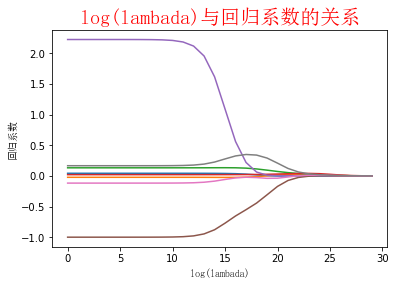

In [15]:
    font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=14)
    abX, abY = loadDataSet('abalone.txt')
    redgeWeights = ridgeTest(abX, abY)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(redgeWeights)    
    ax_title_text = ax.set_title(u'log(lambada)与回归系数的关系', FontProperties = font)
    ax_xlabel_text = ax.set_xlabel(u'log(lambada)', FontProperties = font)
    ax_ylabel_text = ax.set_ylabel(u'回归系数', FontProperties = font)
    plt.setp(ax_title_text, size = 20, weight = 'bold', color = 'red')
    plt.setp(ax_xlabel_text, size = 10, weight = 'bold', color = 'black')
    plt.setp(ax_ylabel_text, size = 10, weight = 'bold', color = 'black')
    plt.show()


图绘制了回归系数与$log(\lambda)$的关系。在最左边，即$\lambda$最小时，可以得到所有系数的原始值（与线性回归一致）；而在右边，系数全部缩减成0；在中间部分的某个位置，将会得到最好的预测结果。

### 编程要求

略

### 实战练习

1.岭回归是一种专用于共线性数据分析的（）回归方法

A.无偏估计

B.有偏估计

C.线性

### 参考答案

1.B